# 1. Importing modules and Loading Data

In [26]:
import pandas as pd
import numpy as np

# graphing libraries
import matplotlib.pyplot as plt
import seaborn as sns

DATA_DIR = "data/"

# load the dataset
df_train = pd.read_csv(DATA_DIR + "train.csv")
df_test = pd.read_csv(DATA_DIR + "test.csv")

# 2. Exploratory Data Analysis

In [27]:
df_train.head(5)

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [29]:
# check for missing values and show percentage
missing_values = df_train.isnull().sum()
missing_percentage = (missing_values / len(df_train)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_df = missing_df[missing_df['Missing Values'] > 0]
missing_df.sort_values(by='Percentage', ascending=False)


,Missing Values,Percentage
veil-type,2957493,94.884350
spore-print-color,2849682,91.425482
stem-root,2757023,88.452732
veil-color,2740947,87.936970
stem-surface,1980861,63.551362
gill-spacing,1258435,40.373988
cap-surface,671023,21.528227
gill-attachment,523936,16.809280
ring-type,128880,4.134818
gill-color,57,0.001829


In [30]:
# Check for duplicate rows
duplicate_rows = df_train.duplicated().sum()
print(f"Number of duplicate rows in training set: {duplicate_rows}")

Number of duplicate rows in training set: 0


In [31]:
# get categorical and numerical columns
categorical_cols = df_train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = [col for col in df_train.select_dtypes(include=['int64', 'float64']).columns if col != 'id']

print(f"Categorical columns ({len(categorical_cols)}):", categorical_cols)
print(f"Numerical columns ({len(numerical_cols)}):", numerical_cols)

Categorical columns (18): ['class', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']
Numerical columns (3): ['cap-diameter', 'stem-height', 'stem-width']


In [32]:
# descriptive statistics for numerical features
df_train[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
cap-diameter,3116941.0,6.309848,4.657931,0.03,3.32,5.75,8.24,80.67
stem-height,3116945.0,6.348333,2.699755,0.00,4.67,5.88,7.41,88.72
stem-width,3116945.0,11.153785,8.095477,0.00,4.97,9.65,15.63,102.90


In [33]:
df_train[categorical_cols].describe().T

,count,unique,top,freq
class,3116945,2,p,1705396
cap-shape,3116905,74,x,1436026
cap-surface,2445922,83,t,460777
cap-color,3116933,78,n,1359542
does-bruise-or-bleed,3116937,26,f,2569743
gill-attachment,2593009,78,a,646034
gill-spacing,1858510,48,c,1331054
gill-color,3116888,63,w,931538
stem-root,359922,38,b,165801
stem-surface,1136084,60,s,327610


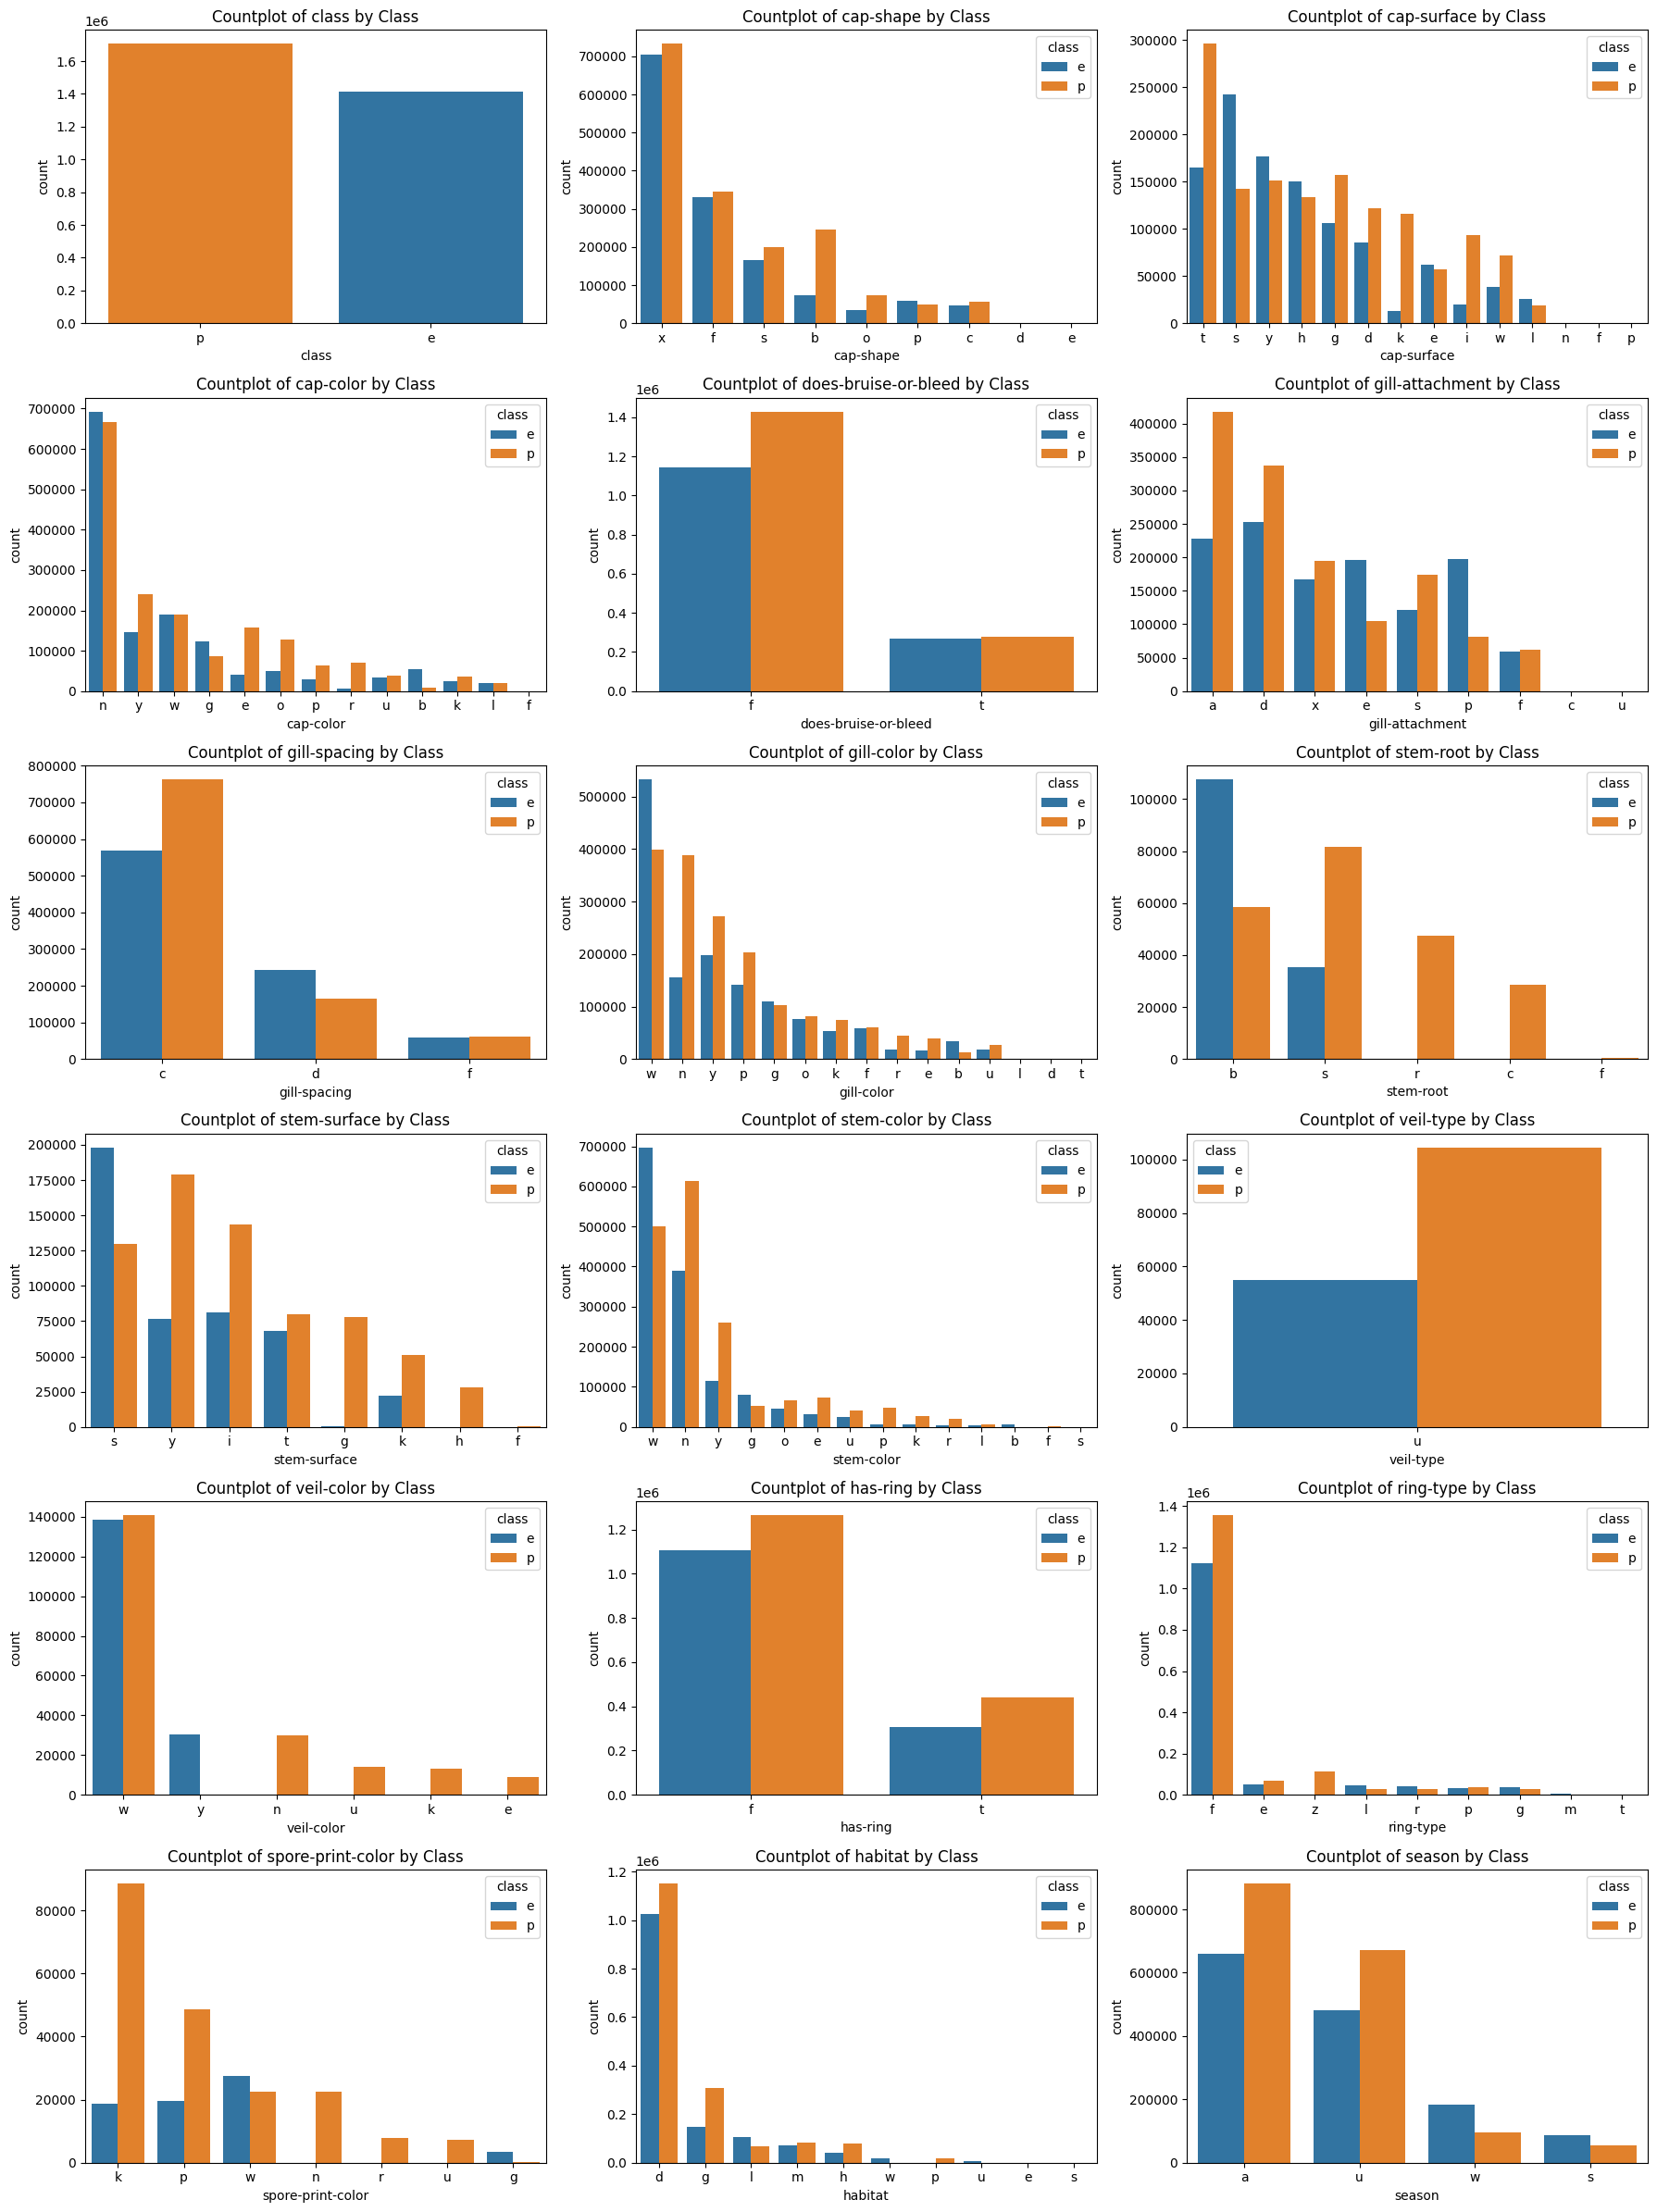

In [34]:
# Plot countplots for categorical features with class as hue, arranged in a grid of 6x3
# exclude counts lower than 50 for clarity
num_cols = 3
num_rows = 6
plt.figure(figsize=(18, 24))
for i, col in enumerate(categorical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(data=df_train, x=col, hue='class', order=df_train[col].value_counts()[df_train[col].value_counts() > 50].index)
    plt.title(f'Countplot of {col} by Class')
    # plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()


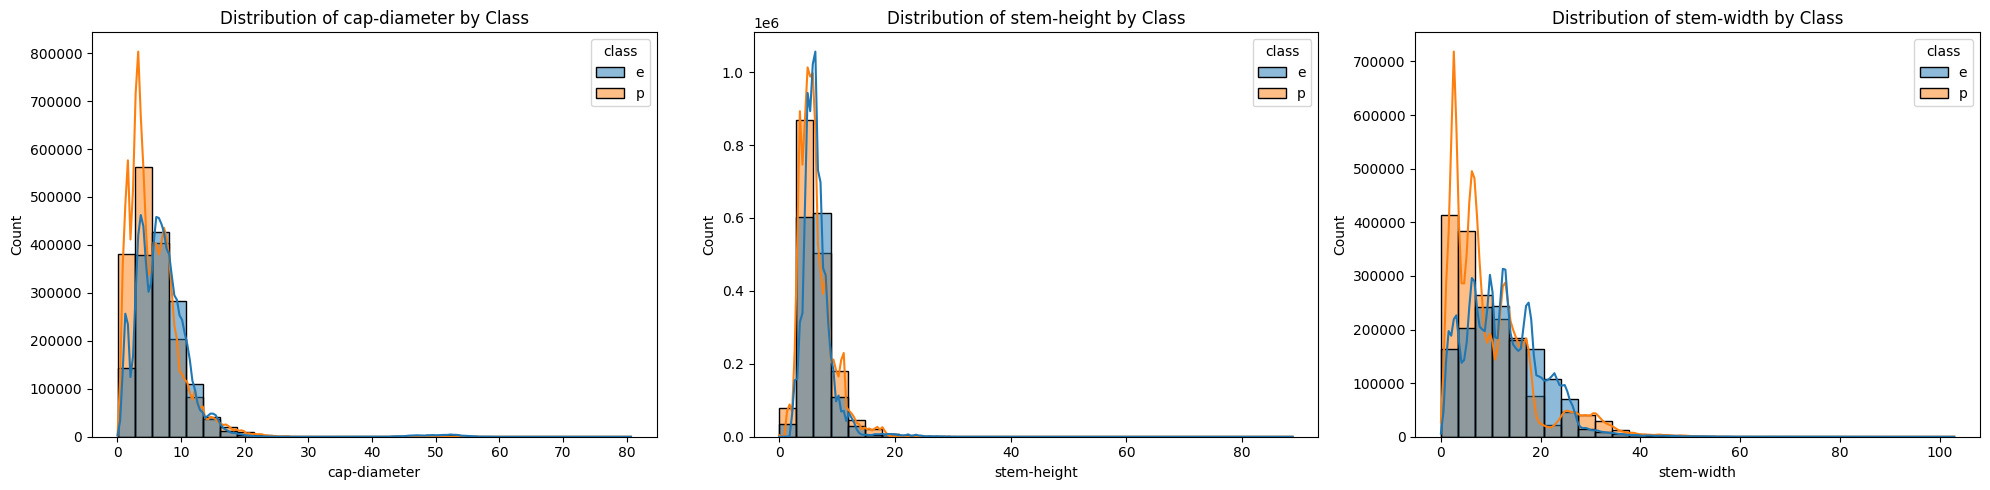

In [35]:
# plot distribution plots for numerical features in one row
plt.figure(figsize=(20, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.histplot(data=df_train, x=col, hue='class', kde=True, bins=30)
    plt.title(f'Distribution of {col} by Class')
    plt.tight_layout()
plt.show()

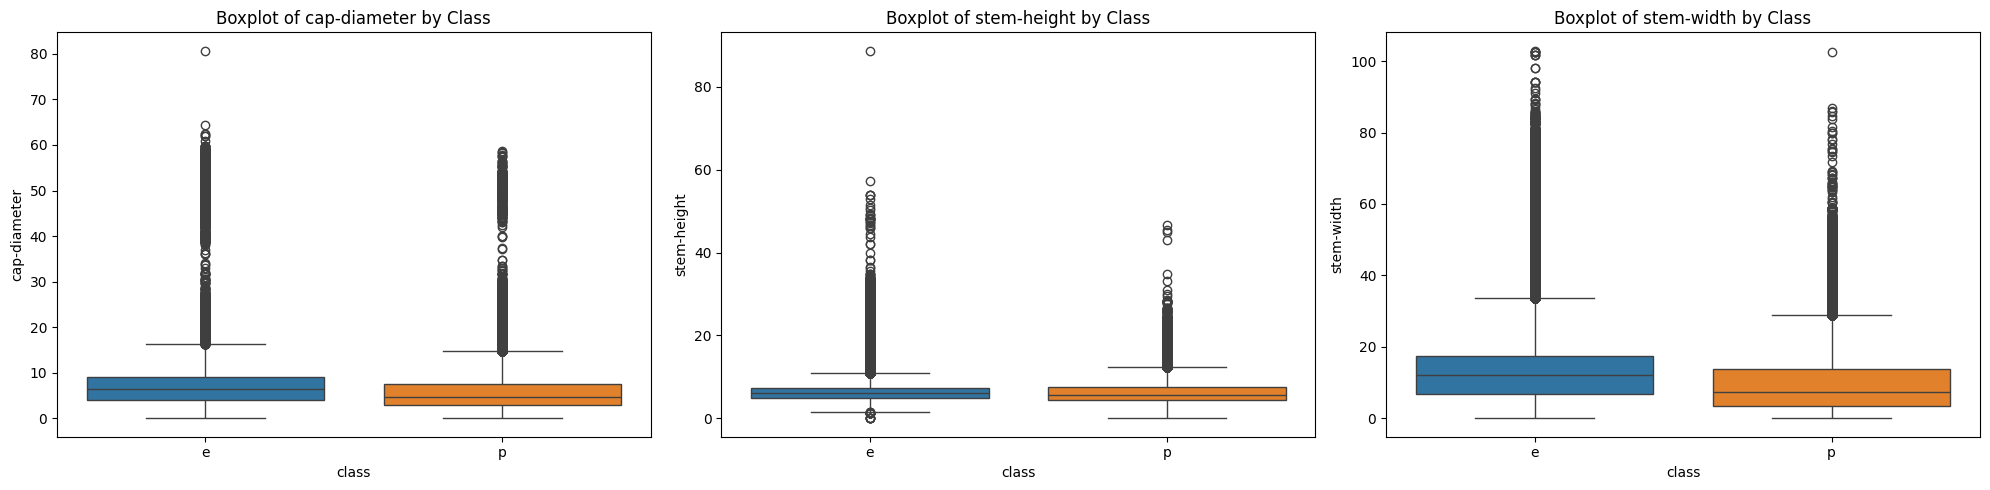

In [36]:
# plot outlier detection for numerical features using boxplots
plt.figure(figsize=(20, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.boxplot(data=df_train, x='class', hue='class', y=col)
    plt.title(f'Boxplot of {col} by Class')
    plt.tight_layout()
plt.show()

# 3. Preprocessing

In [43]:
def cleaner(df):
    for col in categorical_cols:
        df[col] = df[col].fillna('missing')

        # group rare categories into "noise"
        df.loc[df[col].value_counts(dropna=False)[df[col]].values < 100, col] = "noise"

        # drop noise
        # df = df[df[col] != "noise"]

        df[col] = df[col].astype('category')

    return df

In [44]:
cleaned_train = cleaner(df_train.copy())

cleaned_train

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,missing,missing,w,missing,missing,f,f,missing,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,missing,y,o,missing,missing,t,z,missing,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,missing,s,n,missing,missing,f,f,missing,l,w
3,3,e,3.88,f,y,g,f,s,missing,g,...,missing,missing,w,missing,missing,f,f,missing,d,u
4,4,e,5.85,x,l,w,f,d,missing,w,...,missing,missing,w,missing,missing,f,f,missing,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,e,9.29,f,missing,n,t,missing,missing,w,...,b,missing,w,u,w,t,g,missing,d,u
3116941,3116941,e,10.88,s,missing,w,t,d,c,p,...,missing,missing,w,missing,missing,f,f,missing,d,u
3116942,3116942,p,7.82,x,e,e,f,a,missing,w,...,missing,missing,y,missing,w,t,z,missing,d,a
3116943,3116943,e,9.45,p,i,n,t,e,missing,p,...,missing,y,w,missing,missing,t,p,missing,d,u


In [45]:
print(f"Before cleaning: {df_train.shape}\n After cleaning: {cleaned_train.shape}" )

Before cleaning: (3116945, 22)
 After cleaning: (3116945, 22)


# 4. Feature Selection and Engineering

# 5. Building the Model

# 6. Hyperparameter Tuning